# Running the examples from Brian2

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

## COBAH - Network of 4k HH neurons

In [2]:
# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2) * area
gl = (5e-5*siemens*cm**-2) * area

El = -60*mV
EK = -90*mV
ENa = 50*mV
g_na = (100*msiemens*cm**-2) * area
g_kd = (30*msiemens*cm**-2) * area
VT = -63*mV

In [3]:
# Time constants
taue = 5*ms
taui = 10*ms

In [4]:
# Reversal potentials
Ee = 0*mV
Ei = -80*mV
we = 6*nS  # excitatory synaptic weight
wi = 67*nS  # inhibitory synaptic weight

In [5]:
# The model
eqs = Equations('''
dv/dt = (gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-
         g_na*(m*m*m)*h*(v-ENa)-
         g_kd*(n*n*n*n)*(v-EK))/Cm : volt
dm/dt = alpha_m*(1-m)-beta_m*m : 1
dn/dt = alpha_n*(1-n)-beta_n*n : 1
dh/dt = alpha_h*(1-h)-beta_h*h : 1
dge/dt = -ge*(1./taue) : siemens
dgi/dt = -gi*(1./taui) : siemens
alpha_m = 0.32*(mV**-1)*(13*mV-v+VT)/
         (exp((13*mV-v+VT)/(4*mV))-1.)/ms : Hz
beta_m = 0.28*(mV**-1)*(v-VT-40*mV)/
        (exp((v-VT-40*mV)/(5*mV))-1)/ms : Hz
alpha_h = 0.128*exp((17*mV-v+VT)/(18*mV))/ms : Hz
beta_h = 4./(1+exp((40*mV-v+VT)/(5*mV)))/ms : Hz
alpha_n = 0.032*(mV**-1)*(15*mV-v+VT)/
         (exp((15*mV-v+VT)/(5*mV))-1.)/ms : Hz
beta_n = .5*exp((10*mV-v+VT)/(40*mV))/ms : Hz
''')

P = NeuronGroup(4000, model=eqs, threshold='v>-20*mV', refractory=3*ms,
                method='exponential_euler')
Pe = P[:3200]
Pi = P[3200:]
Ce = Synapses(Pe, P, on_pre='ge+=we')
Ci = Synapses(Pi, P, on_pre='gi+=wi')
Ce.connect(p=0.02)
Ci.connect(p=0.02)

In [6]:
# Initialization
P.v = 'El + (randn() * 5 - 5)*mV'
P.ge = '(randn() * 1.5 + 4) * 10.*nS'
P.gi = '(randn() * 12 + 20) * 10.*nS'

In [7]:
# Record a few traces
trace = StateMonitor(P, 'v', record=[1, 10, 100])
run(1 * second, report='text')

Starting simulation at t=0. s for a duration of 1. s
0.7278 (72%) simulated in 10s, estimated 4s remaining.
1.0 (100%) simulated in 13s


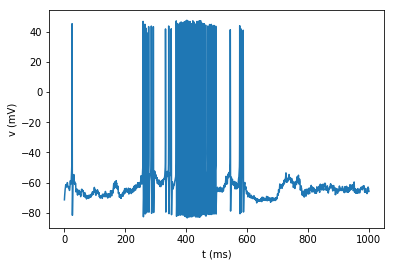

In [8]:
plot(trace.t/ms, trace[1].v/mV)
# plot(trace.t/ms, trace[10].v/mV)
# plot(trace.t/ms, trace[100].v/mV)
xlabel('t (ms)')
ylabel('v (mV)')
show()

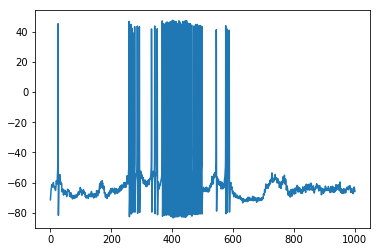

In [9]:
plt.plot(trace.t/ms, trace[1].v/mV);

## CUBA
'''
This is a Brian script implementing a benchmark described
in the following review paper:

Simulation of networks of spiking neurons: A review of tools and strategies
(2007). Brette, Rudolph, Carnevale, Hines, Beeman, Bower, Diesmann, Goodman,
Harris, Zirpe, Natschlager, Pecevski, Ermentrout, Djurfeldt, Lansner, Rochel,
Vibert, Alvarez, Muller, Davison, El Boustani and Destexhe.
Journal of Computational Neuroscience 23(3):349-98

Benchmark 2: random network of integrate-and-fire neurons with exponential
synaptic currents.

Clock-driven implementation with exact subthreshold integration
(but spike times are aligned to the grid).
'''

In [13]:
start_scope()

In [14]:
taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

In [15]:
eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='exact')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)


s_mon = SpikeMonitor(P)

run(1 * second)

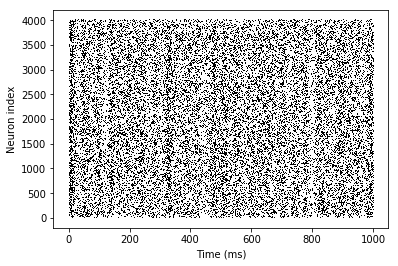

In [16]:
plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()